In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("D:\class\Intern\data\Phishing-Domain- Detection\DATA\domain_dataset_full.csv")

In [3]:
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.0,2.0,2.0,24.0
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.0,0.0,0.0,35.0
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.0,0.0,0.0,21.0
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.0,0.0,2.0,44.0
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...
qty_redirects,88647.0,0.343903,0.783892,-1.0,0.0,0.0,1.0,17.0
url_google_index,88647.0,0.001410,0.058640,-1.0,0.0,0.0,0.0,1.0
domain_google_index,88647.0,0.002019,0.063250,-1.0,0.0,0.0,0.0,1.0
url_shortened,88647.0,0.005482,0.073841,0.0,0.0,0.0,0.0,1.0


In [6]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [7]:
null_summary = pd.DataFrame(df.isnull().sum(), columns=['Null Count'])
null_summary['Percentage Null'] = (null_summary['Null Count'] / len(df)) * 100

# Display features with null values and their percentage
print(null_summary[null_summary['Null Count'] > 0])

Empty DataFrame
Columns: [Null Count, Percentage Null]
Index: []


In [8]:
# There are lots of zero[0] are persent in the dataset it is just like a null value
# so it is not going to help to build our model to get good accuracy.
# simpaly after identifying the about those feature which have lots of zero values then we can do feature engeenering
# and then we can check weather those feature going to impact our model accuracy or not.
def calculate_zero_percentage(df):
    zero_percentage = (df == 0).mean() * 100
    return zero_percentage

zero_percentage = calculate_zero_percentage(df)
print(zero_percentage)

qty_dot_url              0.000000
qty_hyphen_url          82.423545
qty_underline_url       93.988516
qty_slash_url           53.593466
qty_questionmark_url    99.155076
                          ...    
qty_redirects           58.580663
url_google_index        99.655939
domain_google_index     99.599535
url_shortened           99.451758
phishing                65.428046
Length: 112, dtype: float64


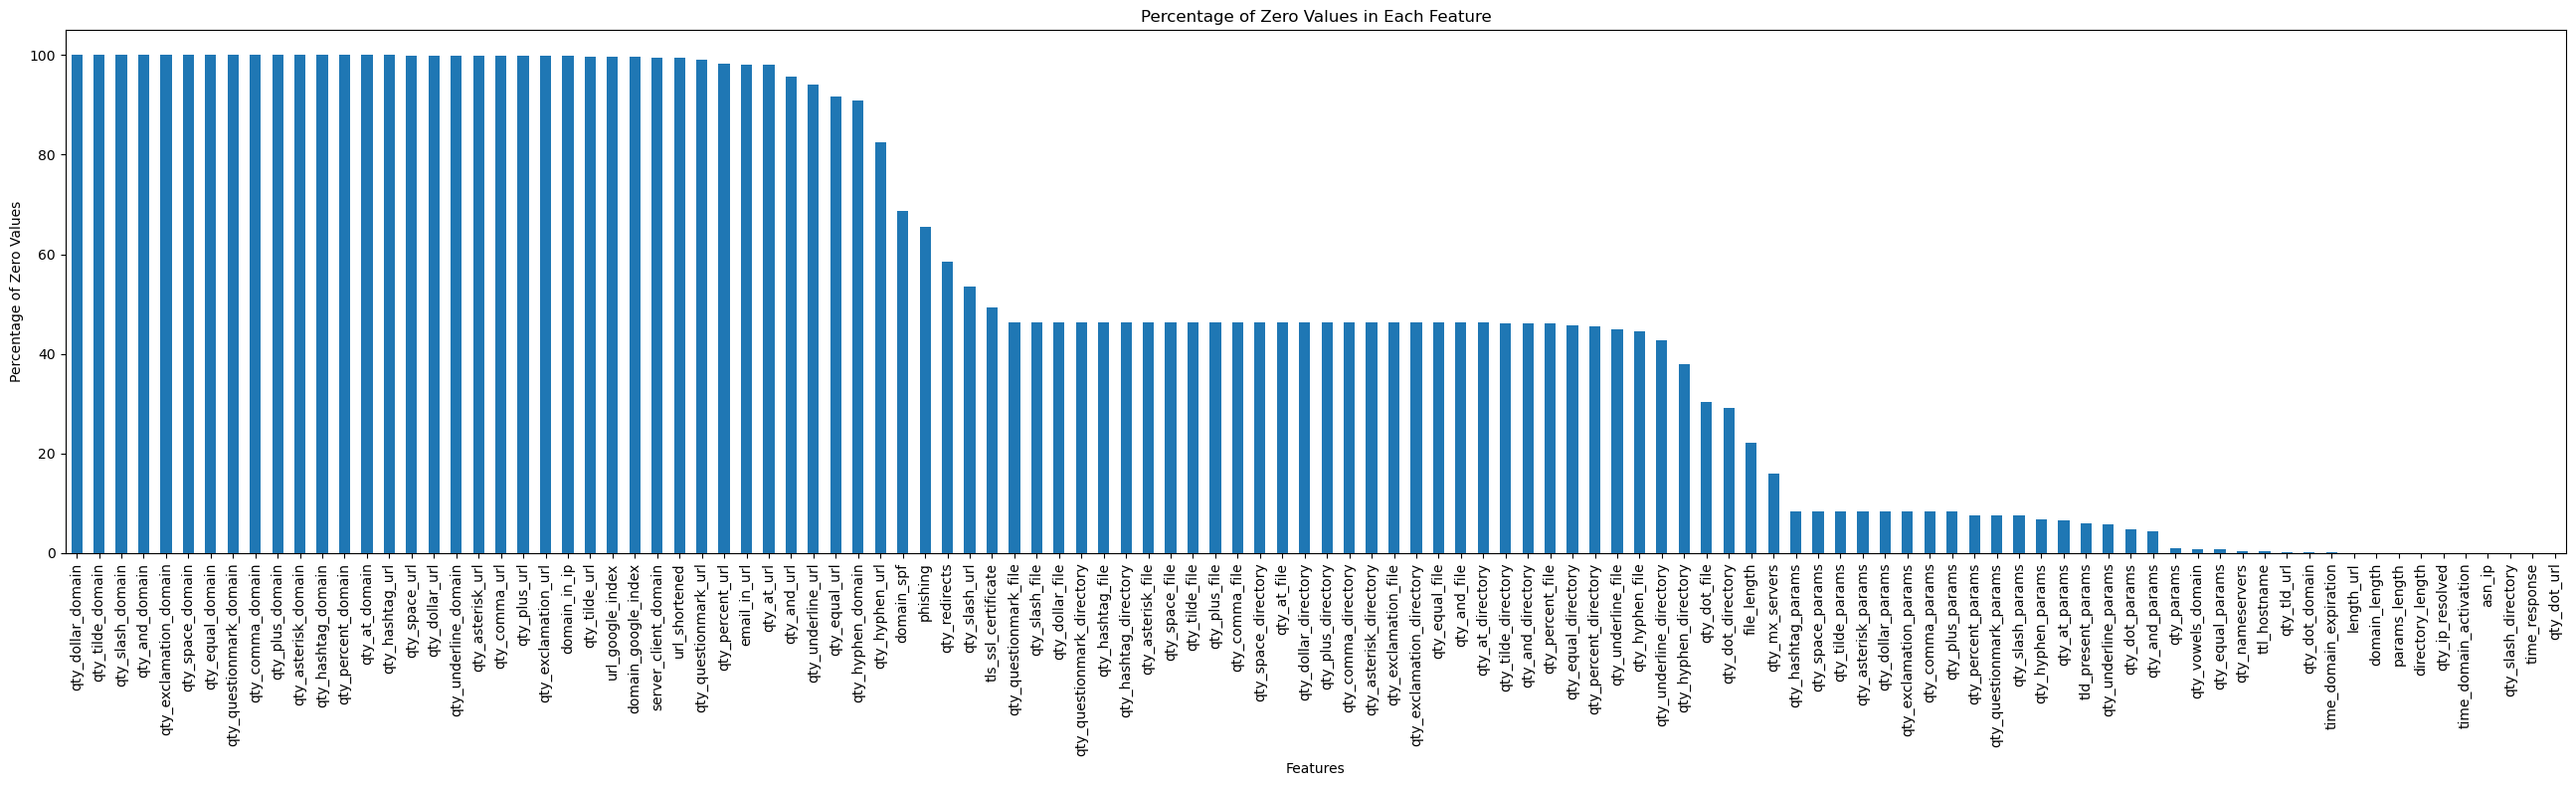

In [9]:
def calculate_zero_percentage(df):
    zero_percentage = (df == 0).mean() * 100
    return zero_percentage

# Example usage:
# Assuming df is your DataFrame with features
zero_percentage = calculate_zero_percentage(df)

# Create a bar plot
plt.figure(figsize=(26, 8))
zero_percentage.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Percentage of Zero Values')
plt.title('Percentage of Zero Values in Each Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [10]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [11]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_true, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [12]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

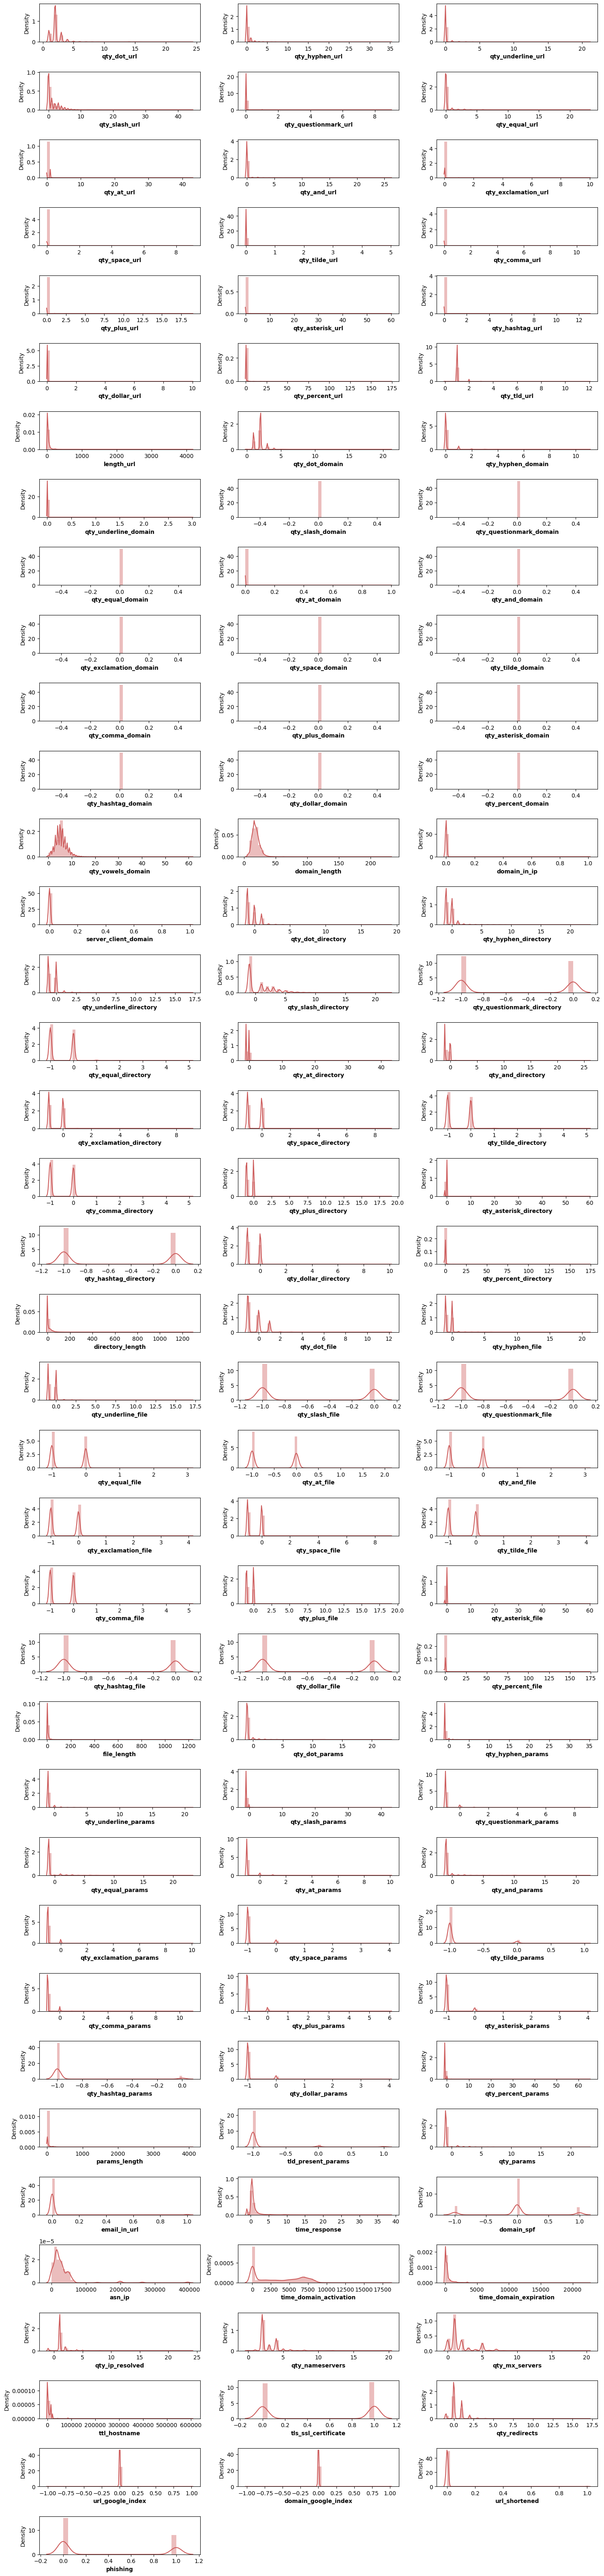

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [14]:
# Splitting X and y for all Experiments
columns_to_drop = ['phishing']
X_train= df.drop(columns=columns_to_drop, axis=1)
y_train = df['phishing']

In [15]:
from sklearn.model_selection import cross_val_score, KFold
def feature_selection_with_cross_val(X_train, y_train, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores_x = []
    f1_scores_y = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # Predict and calculate F1-score for X_train
        y_pred_x = model.predict(X_train_fold)
        f1_x = f1_score(y_train_fold, y_pred_x)
        f1_scores_x.append(f1_x)

        # Predict and calculate F1-score for y_train
        y_pred_y = model.predict(X_val_fold)  # Using validation set from X_train
        f1_y = f1_score(y_val_fold, y_pred_y)
        f1_scores_y.append(f1_y)

    return f1_scores_x, f1_scores_y

# Create a model instance (you can replace this with your preferred model)
model = XGBClassifier()

# Perform feature selection and cross-validation
f1_scores_x, f1_scores_y = feature_selection_with_cross_val(X_train, y_train, model)

# Print the average F1-scores for both X_train and y_train
print("Average F1-score for X_train:", np.mean(f1_scores_x))
print("Average F1-score for y_train:", np.mean(f1_scores_y))

Average F1-score for X_train: 0.9745801488425954
Average F1-score for y_train: 0.9567874179495794


In [16]:
# Splitting X and y for all Experiments
columns_to_drop = ['phishing', 'qty_dollar_domain', 'qty_tilde_domain', 'qty_slash_domain', 'qty_and_domain', 'qty_exclamation_domain', 
'qty_space_domain', 'qty_equal_domain', 'qty_questionmark_domain', 'qty_comma_domain', 'qty_plus_domain', 
'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_percent_domain', 'qty_at_domain', 'qty_hashtag_url', 
'qty_space_url', 'qty_dollar_url', 'qty_underline_domain', 'qty_asterisk_url','qty_comma_url', 'qty_plus_url', 
'qty_exclamation_url', 'domain_in_ip', 'qty_tilde_url', 'url_google_index', 'domain_google_index', 'server_client_domain', 
'url_shortened', 'qty_questionmark_url', 'qty_percent_url', 'email_in_url', 'qty_at_url', 'qty_and_url', 
                   'qty_underline_url', 'qty_equal_url','qty_hyphen_domain', 'qty_hyphen_url','domain_spf'
                  ]
X_train1= df.drop(columns=columns_to_drop, axis=1)
y_train1 = df['phishing']

In [17]:
def feature_selection_with_cross_val(X_train1, y_train1, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores_x = []
    f1_scores_y = []

    for train_idx, val_idx in kf.split(X_train1, y_train1):
        X_train_fold, X_val_fold = X_train1.iloc[train_idx], X_train1.iloc[val_idx]
        y_train_fold, y_val_fold = y_train1.iloc[train_idx], y_train1.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # Predict and calculate F1-score for X_train
        y_pred_x = model.predict(X_train_fold)
        f1_x = f1_score(y_train_fold, y_pred_x)
        f1_scores_x.append(f1_x)

        # Predict and calculate F1-score for y_train
        y_pred_y = model.predict(X_val_fold)  # Using validation set from X_train
        f1_y = f1_score(y_val_fold, y_pred_y)
        f1_scores_y.append(f1_y)

    return f1_scores_x, f1_scores_y

# Create a model instance (you can replace this with your preferred model)
model = XGBClassifier()

# Perform feature selection and cross-validation
f1_scores_x, f1_scores_y = feature_selection_with_cross_val(X_train1, y_train1, model)

# Print the average F1-scores for both X_train and y_train
print("Average F1-score for X_train:", np.mean(f1_scores_x))
print("Average F1-score for y_train:", np.mean(f1_scores_y))

Average F1-score for X_train: 0.9741612157451517
Average F1-score for y_train: 0.9569907003179312


In [18]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [19]:
result_report = evaluate_models(X_train1, y_train1, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 2030.
----------------------------------
Model performance for Test set
- Accuracy: 0.9695
- F1 score: 0.9561
- Precision: 0.9501
- Recall: 0.9621
- Roc Auc Score: 0.9677
- COST: 119090.


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 3000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9560
- F1 score: 0.9366
- Precision: 0.9308
- Recall: 0.9425
- Roc Auc Score: 0.9528
- COST: 180290.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9547
- F1 score: 0.9346
- Precision: 0.9343
- Recall: 0.9349
- Roc Auc Score: 0.9501
- COST: 814130.
----------------------------------
Model performance for Test set
- Accuracy: 0.9528
- F1 score: 0.9320
- Precision: 0.9271
- Recall: 0.9369
-

In [20]:
result_report

,Model Name,Cost
0,Random Forest,119090
5,XGBClassifier,123940
6,CatBoosting Classifier,127540
1,Decision Tree,180290
2,Gradient Boosting,197510
7,AdaBoost Classifier,291260
3,Logistic Regression,327380
4,K-Neighbors Classifier,576630


In [21]:
# fit robust scaler
rob_scaler = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [22]:
X_robus = rob_scaler.fit_transform(X_train1)

In [23]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_robus, y_train1)

In [24]:
result_report = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 2000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9792
- F1 score: 0.9793
- Precision: 0.9758
- Recall: 0.9828
- Roc Auc Score: 0.9792
- COST: 101810.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 1000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9642
- F1 score: 0.9641
- Precision: 0.9670
- Recall: 0.9612
- Roc Auc Score: 0.9642
- COST: 227280.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9589
- F1 score: 0.9594
- Precision: 0.9502
- Recall: 0.9687
- Roc Auc Score: 0.9589
- COST: 745940.
----------------------------------
Model performance for Test set
- Accuracy: 0.9581
- F1 score: 0.9584
- Precision: 0.9497
- Recall: 0.9673
-

In [25]:
result_report

,Model Name,Cost
0,Random Forest,101810
6,CatBoosting Classifier,124030
5,XGBClassifier,124920
4,K-Neighbors Classifier,154060
2,Gradient Boosting,193900
1,Decision Tree,227280
7,AdaBoost Classifier,311570
3,Logistic Regression,330660


In [26]:
pca_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [27]:
X_pca = pca_pipeline.fit_transform(X_train1)

In [28]:
from sklearn.decomposition import PCA
X_pca = pca_pipeline.fit_transform(X_train1)

var_ratio = {}
for n in range(2, min(X_train1.shape[0], X_train1.shape[1]) + 1):
    pc = PCA(n_components=n)
    df_pca = pc.fit(X_pca)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

<AxesSubplot:>

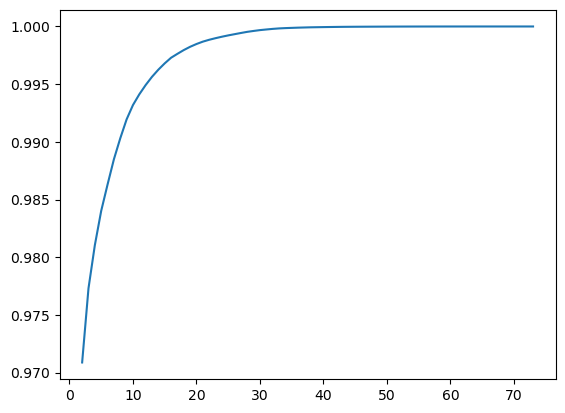

In [29]:
# plotting variance ratio
pd.Series(var_ratio).plot()

<Figure size 500x500 with 0 Axes>

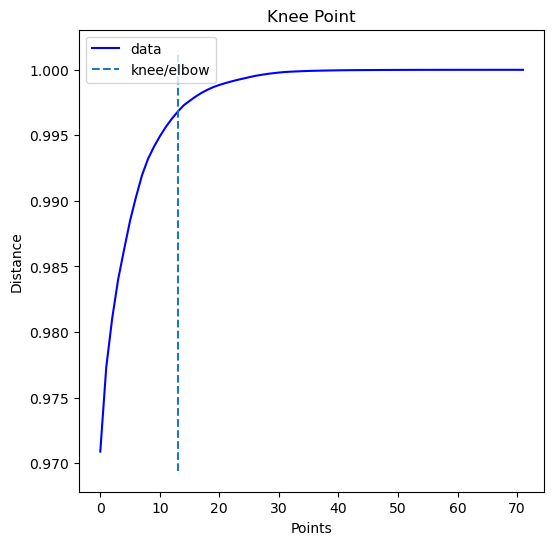

Knee Locator k = 15


In [30]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [31]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=15,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [32]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y_train1)

In [33]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 2000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9660
- F1 score: 0.9661
- Precision: 0.9586
- Recall: 0.9737
- Roc Auc Score: 0.9660
- COST: 155320.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 2000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9457
- F1 score: 0.9456
- Precision: 0.9431
- Recall: 0.9481
- Roc Auc Score: 0.9457
- COST: 304060.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9382
- F1 score: 0.9394
- Precision: 0.9226
- Recall: 0.9569
- Roc Auc Score: 0.9382
- COST: 1030500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9364
- F1 score: 0.9373
- Precision: 0.9199
- Recall: 0.9554


In [34]:
report_pca

,Model Name,Cost
0,Random Forest,155320
4,K-Neighbors Classifier,186470
6,CatBoosting Classifier,200870
5,XGBClassifier,207180
3,Logistic Regression,250780
2,Gradient Boosting,265030
1,Decision Tree,304060
7,AdaBoost Classifier,352580


# Final model

In [35]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Train_Accuracy","Test_Accuracy","Total_cost"]
pt.add_row(["RandomForest","0.9999","0.9777","93340"])
pt.add_row(["XGBClassifier","0.9883","0.9779","94220"])
pt.add_row(["KNeighborsClassifier","1.0","0.9789","60920"])
pt.add_row(["CatBoostClassifier","0.9868","0.9771","62470"])
print(pt)

+----------------------+----------------+---------------+------------+
|        Model         | Train_Accuracy | Test_Accuracy | Total_cost |
+----------------------+----------------+---------------+------------+
|     RandomForest     |     0.9999     |     0.9777    |   93340    |
|    XGBClassifier     |     0.9883     |     0.9779    |   94220    |
| KNeighborsClassifier |      1.0       |     0.9789    |   60920    |
|  CatBoostClassifier  |     0.9868     |     0.9771    |   62470    |
+----------------------+----------------+---------------+------------+


In [36]:
R_final_model = RandomForestClassifier()
X_robus = rob_scaler.fit_transform(X_train1)
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_robus, y_train1)

In [37]:
X_train1, X_test, y_train1, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

R_final_model = R_final_model.fit(X_train1, y_train1)
y_pred = R_final_model.predict(X_test)

In [38]:
print("Final RandomForest Classifier Accuracy Score (Train) :", R_final_model.score(X_train1,y_train1))
print("Final RandomForest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final RandomForest Classifier Accuracy Score (Train) : 0.9999783296493737
Final RandomForest Classifier Accuracy Score (Test) : 0.9792840426454017


In [39]:
print("Final RandomForest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final RandomForest Classifier Cost Metric(Test) : 100820


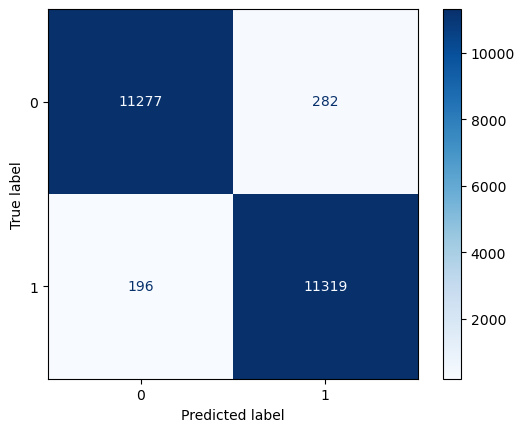

In [40]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(R_final_model, X_test, y_test, cmap='Blues', values_format='d')

In [41]:
final_model = XGBClassifier()
X_robus = rob_scaler.fit_transform(X_train1)
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_robus, y_train1)

In [42]:
X_train1, X_test, y_train1, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train1, y_train1)
y_pred = final_model.predict(X_test)

In [43]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train1,y_train1))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.9875912309553257
Final XGBoost Classifier Accuracy Score (Test) : 0.9783636857841805


In [44]:
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final XGBoost Classifier Cost Metric(Test) : 98060


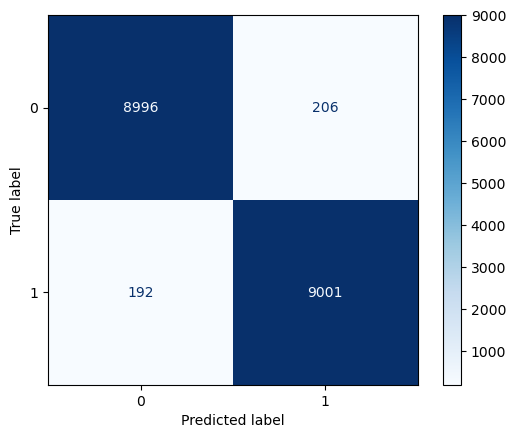

In [45]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

In [46]:
K_final_model = KNeighborsClassifier()
X_robus = rob_scaler.fit_transform(X_train1)
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_robus, y_train1)

In [47]:
X_train1, X_test, y_train1, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

K_final_model = K_final_model.fit(X_train1, y_train1)
y_pred = K_final_model.predict(X_test)

In [48]:
print("Final KNeighbors Classifier Accuracy Score (Train) :", K_final_model.score(X_train1,y_train1))
print("Final KNeighbors Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final KNeighbors Classifier Accuracy Score (Train) : 0.9705171004224009
Final KNeighbors Classifier Accuracy Score (Test) : 0.9553072625698324


In [49]:
print("Final KNeighbors Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final KNeighbors Classifier Cost Metric(Test) : 116810


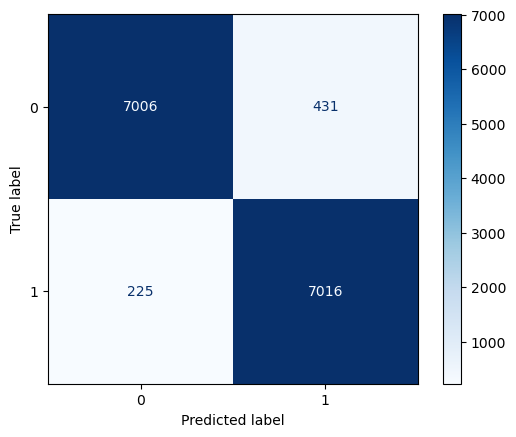

In [50]:
#plots Confusion matrix
plot_confusion_matrix(K_final_model, X_test, y_test, cmap='Blues', values_format='d')

In [51]:
C_final_model = CatBoostClassifier()
X_robus = rob_scaler.fit_transform(X_train1)
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_robus, y_train1)

In [52]:
X_train1, X_test, y_train1, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

C_final_model = C_final_model.fit(X_train1, y_train1)
y_pred = C_final_model.predict(X_test)

Learning rate set to 0.053317
0:	learn: 0.5942694	total: 13.5ms	remaining: 13.4s
1:	learn: 0.5189349	total: 23.2ms	remaining: 11.6s
2:	learn: 0.4596753	total: 32.7ms	remaining: 10.9s
3:	learn: 0.4131188	total: 42.5ms	remaining: 10.6s
4:	learn: 0.3755066	total: 52.3ms	remaining: 10.4s
5:	learn: 0.3406457	total: 62.1ms	remaining: 10.3s
6:	learn: 0.3140643	total: 71.5ms	remaining: 10.1s
7:	learn: 0.2921185	total: 80.7ms	remaining: 10s
8:	learn: 0.2757134	total: 90.4ms	remaining: 9.96s
9:	learn: 0.2593844	total: 100ms	remaining: 9.89s
10:	learn: 0.2461793	total: 109ms	remaining: 9.82s
11:	learn: 0.2368129	total: 119ms	remaining: 9.77s
12:	learn: 0.2270399	total: 128ms	remaining: 9.75s
13:	learn: 0.2193497	total: 138ms	remaining: 9.74s
14:	learn: 0.2133768	total: 148ms	remaining: 9.7s
15:	learn: 0.2064979	total: 157ms	remaining: 9.67s
16:	learn: 0.2006904	total: 167ms	remaining: 9.64s
17:	learn: 0.1963637	total: 179ms	remaining: 9.75s
18:	learn: 0.1921308	total: 188ms	remaining: 9.71s
19:	l

168:	learn: 0.0944173	total: 1.64s	remaining: 8.06s
169:	learn: 0.0941748	total: 1.65s	remaining: 8.06s
170:	learn: 0.0939822	total: 1.66s	remaining: 8.05s
171:	learn: 0.0937858	total: 1.67s	remaining: 8.05s
172:	learn: 0.0935813	total: 1.68s	remaining: 8.04s
173:	learn: 0.0933986	total: 1.69s	remaining: 8.03s
174:	learn: 0.0932104	total: 1.7s	remaining: 8.02s
175:	learn: 0.0930885	total: 1.71s	remaining: 8.01s
176:	learn: 0.0928834	total: 1.72s	remaining: 8s
177:	learn: 0.0927135	total: 1.73s	remaining: 7.99s
178:	learn: 0.0925353	total: 1.74s	remaining: 7.98s
179:	learn: 0.0922884	total: 1.75s	remaining: 7.97s
180:	learn: 0.0921272	total: 1.76s	remaining: 7.96s
181:	learn: 0.0919205	total: 1.77s	remaining: 7.95s
182:	learn: 0.0916425	total: 1.78s	remaining: 7.94s
183:	learn: 0.0914389	total: 1.79s	remaining: 7.93s
184:	learn: 0.0912367	total: 1.8s	remaining: 7.92s
185:	learn: 0.0911147	total: 1.81s	remaining: 7.91s
186:	learn: 0.0910084	total: 1.82s	remaining: 7.9s
187:	learn: 0.0908

347:	learn: 0.0715127	total: 3.32s	remaining: 6.22s
348:	learn: 0.0714926	total: 3.33s	remaining: 6.21s
349:	learn: 0.0714072	total: 3.34s	remaining: 6.21s
350:	learn: 0.0713556	total: 3.35s	remaining: 6.2s
351:	learn: 0.0713138	total: 3.36s	remaining: 6.19s
352:	learn: 0.0712507	total: 3.37s	remaining: 6.18s
353:	learn: 0.0712340	total: 3.38s	remaining: 6.17s
354:	learn: 0.0711740	total: 3.39s	remaining: 6.16s
355:	learn: 0.0710438	total: 3.4s	remaining: 6.15s
356:	learn: 0.0708996	total: 3.41s	remaining: 6.14s
357:	learn: 0.0707331	total: 3.42s	remaining: 6.13s
358:	learn: 0.0706669	total: 3.43s	remaining: 6.12s
359:	learn: 0.0706430	total: 3.44s	remaining: 6.11s
360:	learn: 0.0705994	total: 3.45s	remaining: 6.1s
361:	learn: 0.0705783	total: 3.46s	remaining: 6.09s
362:	learn: 0.0705708	total: 3.46s	remaining: 6.08s
363:	learn: 0.0704938	total: 3.47s	remaining: 6.07s
364:	learn: 0.0703345	total: 3.48s	remaining: 6.06s
365:	learn: 0.0701808	total: 3.49s	remaining: 6.05s
366:	learn: 0.0

507:	learn: 0.0610431	total: 4.82s	remaining: 4.67s
508:	learn: 0.0610066	total: 4.83s	remaining: 4.66s
509:	learn: 0.0609242	total: 4.84s	remaining: 4.65s
510:	learn: 0.0608582	total: 4.85s	remaining: 4.64s
511:	learn: 0.0607914	total: 4.86s	remaining: 4.63s
512:	learn: 0.0607142	total: 4.87s	remaining: 4.62s
513:	learn: 0.0606497	total: 4.88s	remaining: 4.61s
514:	learn: 0.0606370	total: 4.89s	remaining: 4.61s
515:	learn: 0.0605787	total: 4.9s	remaining: 4.6s
516:	learn: 0.0605727	total: 4.91s	remaining: 4.58s
517:	learn: 0.0605444	total: 4.92s	remaining: 4.58s
518:	learn: 0.0605099	total: 4.93s	remaining: 4.57s
519:	learn: 0.0604324	total: 4.94s	remaining: 4.56s
520:	learn: 0.0604023	total: 4.95s	remaining: 4.55s
521:	learn: 0.0603966	total: 4.95s	remaining: 4.54s
522:	learn: 0.0603513	total: 4.96s	remaining: 4.53s
523:	learn: 0.0602941	total: 4.97s	remaining: 4.52s
524:	learn: 0.0602566	total: 4.98s	remaining: 4.51s
525:	learn: 0.0602400	total: 4.99s	remaining: 4.5s
526:	learn: 0.0

687:	learn: 0.0528018	total: 6.5s	remaining: 2.94s
688:	learn: 0.0527473	total: 6.51s	remaining: 2.94s
689:	learn: 0.0527239	total: 6.51s	remaining: 2.93s
690:	learn: 0.0526760	total: 6.52s	remaining: 2.92s
691:	learn: 0.0526611	total: 6.53s	remaining: 2.91s
692:	learn: 0.0525971	total: 6.54s	remaining: 2.9s
693:	learn: 0.0525700	total: 6.55s	remaining: 2.89s
694:	learn: 0.0525345	total: 6.56s	remaining: 2.88s
695:	learn: 0.0524488	total: 6.57s	remaining: 2.87s
696:	learn: 0.0524252	total: 6.58s	remaining: 2.86s
697:	learn: 0.0523166	total: 6.59s	remaining: 2.85s
698:	learn: 0.0522933	total: 6.6s	remaining: 2.84s
699:	learn: 0.0522515	total: 6.61s	remaining: 2.83s
700:	learn: 0.0522170	total: 6.62s	remaining: 2.82s
701:	learn: 0.0521871	total: 6.62s	remaining: 2.81s
702:	learn: 0.0521630	total: 6.63s	remaining: 2.8s
703:	learn: 0.0521540	total: 6.64s	remaining: 2.79s
704:	learn: 0.0521312	total: 6.65s	remaining: 2.78s
705:	learn: 0.0520805	total: 6.66s	remaining: 2.77s
706:	learn: 0.05

868:	learn: 0.0468301	total: 8.16s	remaining: 1.23s
869:	learn: 0.0467891	total: 8.17s	remaining: 1.22s
870:	learn: 0.0467626	total: 8.18s	remaining: 1.21s
871:	learn: 0.0467371	total: 8.19s	remaining: 1.2s
872:	learn: 0.0467309	total: 8.2s	remaining: 1.19s
873:	learn: 0.0467191	total: 8.21s	remaining: 1.18s
874:	learn: 0.0466737	total: 8.22s	remaining: 1.17s
875:	learn: 0.0466522	total: 8.23s	remaining: 1.16s
876:	learn: 0.0466453	total: 8.23s	remaining: 1.15s
877:	learn: 0.0466171	total: 8.24s	remaining: 1.15s
878:	learn: 0.0465806	total: 8.25s	remaining: 1.14s
879:	learn: 0.0465626	total: 8.26s	remaining: 1.13s
880:	learn: 0.0464947	total: 8.27s	remaining: 1.12s
881:	learn: 0.0464800	total: 8.28s	remaining: 1.11s
882:	learn: 0.0464682	total: 8.29s	remaining: 1.1s
883:	learn: 0.0464530	total: 8.3s	remaining: 1.09s
884:	learn: 0.0464453	total: 8.31s	remaining: 1.08s
885:	learn: 0.0464031	total: 8.32s	remaining: 1.07s
886:	learn: 0.0463629	total: 8.33s	remaining: 1.06s
887:	learn: 0.04

In [53]:
print("Final CatBoost Classifier Accuracy Score (Train) :", C_final_model.score(X_train1,y_train1))
print("Final CatBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final CatBoost Classifier Accuracy Score (Train) : 0.9876135952497499
Final CatBoost Classifier Accuracy Score (Test) : 0.976760023835873


In [54]:
print("Final CatBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final CatBoost Classifier Cost Metric(Test) : 64960


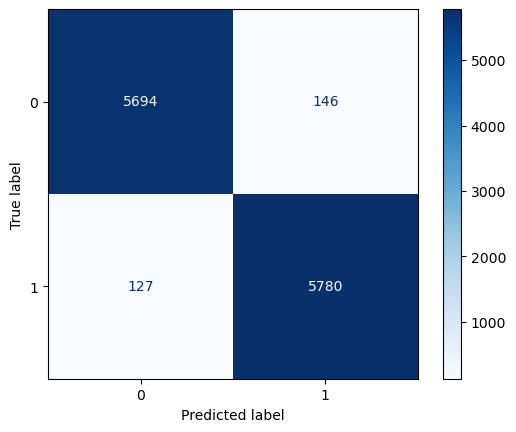

In [55]:
#plots Confusion matrix
plot_confusion_matrix(C_final_model, X_test, y_test, cmap='Blues', values_format='d')